# É um carro? 

In [1]:
"""


                      _____
                   ,-'     `._
                 ,'           `.        ,-.
               ,'               \       ),.\
     ,.       /                  \     /(  \;
    /'\\     ,o.        ,ooooo.   \  ,'  `-')
    )) )`. d8P"Y8.    ,8P'''Y8.  `'  .--''
   (`-'   `Y'  `Y8    dP       `'     /
    `----.(   __ `    ,' ,---.       (
           ),--.`.   (  ;,---.        )
          / \O_,' )   \  \O_,'        |
         ;  `-- ,'       `---'        |
         |    -'         `.           |
        _;    ,            )          :
     _.'|     `.:._   ,.::" `..       |
  --'   |   .'     '''         `      |`.
        |  :;      :   :     _.       |`.`.-'--.
        |  ' .     :   :__.,'|/       |  \
        `     \--.__.-'|_|_|-/        /   )
         \     \_   `--^"__,'        ,    |
         ;  `    `--^---'          ,'     |
          \  `                    /      /
           \   `    _ _          /
            \           `       /
             \           '    ,'
              `.       ,   _,'
                `-.___.---'
"""

'\n\n\n                      _____\n                   ,-\'     `._\n                 ,\'           `.        ,-.\n               ,\'               \\       ),.     ,.       /                  \\     /(  \\;\n    /\'\\     ,o.        ,ooooo.   \\  ,\'  `-\')\n    )) )`. d8P"Y8.    ,8P\'\'\'Y8.  `\'  .--\'\'\n   (`-\'   `Y\'  `Y8    dP       `\'     /\n    `----.(   __ `    ,\' ,---.       (\n           ),--.`.   (  ;,---.        )\n          / \\O_,\' )   \\  \\O_,\'        |\n         ;  `-- ,\'       `---\'        |\n         |    -\'         `.           |\n        _;    ,            )          :\n     _.\'|     `.:._   ,.::" `..       |\n  --\'   |   .\'     \'\'\'         `      |`.\n        |  :;      :   :     _.       |`.`.-\'--.\n        |  \' .     :   :__.,\'|/       |          `     \\--.__.-\'|_|_|-/        /   )\n         \\     \\_   `--^"__,\'        ,    |\n         ;  `    `--^---\'          ,\'     |\n          \\  `                    /      /\n           \\   `    

In [2]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.4 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


As etapas básicas que tomaremos são:

 1. Use DuckDuckGo para pesquisar imagens de "fotos de carros"
 1. Use DuckDuckGo para pesquisar imagens de "fotos da motos"
 1. Ajuste uma rede neural pré-treinada para reconhecer esses dois grupos
 1. Experimente executar este modelo na imagem de um pássaro e veja se funciona.

## Step 1: Baixe imagens de carros e motos

In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Procurando por '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Vamos começar procurando uma foto de um carro e ver que tipo de resultado obtemos.  Começaremos obtendo URLs da pesquisa:

In [5]:
urls = search_images('fotos de carro', max_images=1)
urls[0]

Procurando por 'fotos de carro'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


'http://4.bp.blogspot.com/-_18AElD7MMo/UofarY9HYBI/AAAAAAAACIs/DT89R-NObB0/s1600/imagenes+en+HD+(25).jpg'

... e depois baixe um URL e dê uma olhada nele:

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


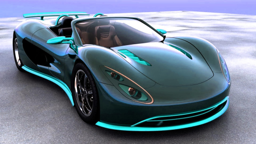

In [6]:
from fastdownload import download_url
dest = 'car.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Agora vamos fazer o mesmo com as "fotos de motos":

Procurando por 'fotos de motos'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


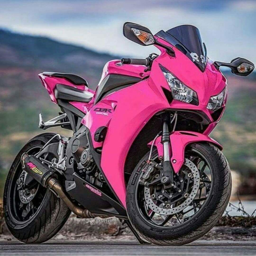

In [7]:
download_url(search_images('fotos de motos', max_images=1)[0], 'moto.jpg', show_progress=False)
Image.open('moto.jpg').to_thumb(256,256)

Nossas pesquisas parecem estar dando resultados razoáveis, então vamos pegar alguns exemplos de cada foto de "carro" e "moto" e salvar cada grupo de fotos em uma pasta diferente (também estou tentando pegar uma variedade de condições de iluminação aqui):

In [8]:
searches = 'carros','motos'
path = Path('carro_ou_moto')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'fotos de {o}'))
    sleep(10)  # Faça uma pausa entre as pesquisas para evitar sobrecarregar o servidor
    download_images(dest, urls=search_images(f'fotos de {o} na chuva'))
    sleep(10)
    download_images(dest, urls=search_images(f'fotos de {o} no brasil'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Procurando por 'fotos de carros'
Procurando por 'fotos de carros na chuva'
Procurando por 'fotos de carros no brasil'
Procurando por 'fotos de motos'
Procurando por 'fotos de motos na chuva'
Procurando por 'fotos de motos no brasil'


## Etapa 2: treinar nosso modelo

Algumas fotos podem não ser baixadas corretamente, o que pode causar falha no treinamento do modelo, portanto, iremos removê-las:

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

Para treinar um modelo, precisaremos de `DataLoaders`, que é um objeto que contém um *conjunto de treinamento* (as imagens usadas para criar um modelo) e um *conjunto de validação* (as imagens usadas para verificar a precisão de um modelo - não usado durante o treinamento).  Em `fastai` podemos criar isso facilmente usando um `DataBlock` e visualizar imagens de amostra dele:

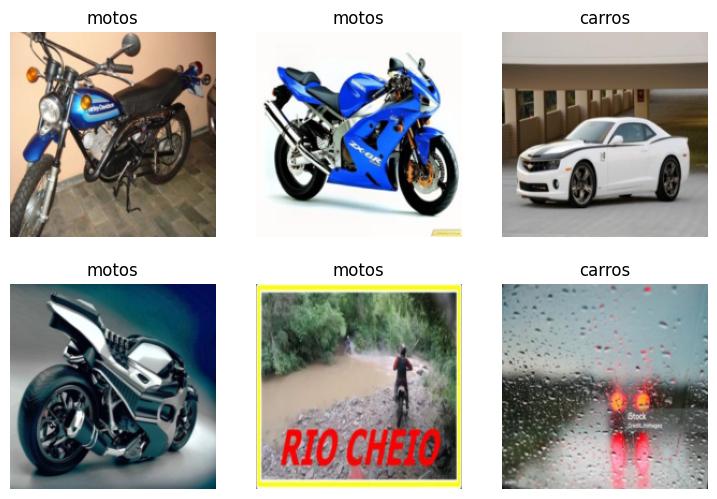

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Aqui está o que cada um dos parâmetros `DataBlock` significa:

    blocks=(ImageBlock, CategoryBlock),

As entradas do nosso modelo são imagens e as saídas são categorias (neste caso, “carros” ou “motos”).

    get_items=get_image_files, 

Para encontrar todas as entradas do nosso modelo, execute a função `get_image_files` (que retorna uma lista de todos os arquivos de imagem em um caminho).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Divida os dados em conjuntos de treinamento e validação aleatoriamente, usando 20% dos dados para o conjunto de validação.

    get_y=parent_label,

Os rótulos (valores `y`) são o nome do `pai` de cada arquivo (ou seja, o nome da pasta em que eles estão, que será *carro* ou *moto*).

    item_tfms=[Resize(192, method='squish')]

Antes do treinamento, redimensione cada imagem para 192x192 pixels "comprimindo-a" (em vez de cortá-la).

Agora estamos prontos para treinar nosso modelo.  O modelo de visão computacional mais rápido e amplamente utilizado é o `resnet18`.  Você pode treinar isso em poucos minutos, mesmo em uma CPU!  (Em uma GPU, geralmente leva menos de 10 segundos...)

`fastai` vem com um método útil `fine_tune()` que usa automaticamente as melhores práticas para ajustar um modelo pré-treinado, então usaremos ele.

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 276MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.247398,0.743278,0.212121,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.206724,0.171613,0.090909,00:01
1,0.142255,0.029767,0.000000,00:01
2,0.099290,0.025382,0.000000,00:00


Geralmente, quando executo isso, vejo 100% de precisão no conjunto de validação (embora possa variar um pouco de execução para execução).

 "Ajustar" um modelo significa que estamos começando com um modelo que outra pessoa treinou usando algum outro conjunto de dados (chamado de *modelo pré-treinado*) e ajustando um pouco os pesos para que o modelo aprenda a reconhecer seu conjunto de dados específico .  Neste caso, o modelo pré-treinado foi treinado para reconhecer fotos em *imagenet* e um conjunto de dados de visão computacional amplamente utilizado com imagens cobrindo 1.000 categorias)

## Etapa 3: use nosso modelo

Vamos ver o que nosso modelo pensa sobre aquele carro que baixamos no início:

In [12]:
is_car,_,probs = learn.predict(PILImage.create('car.jpg'))
print(f"Isso é um(a): {is_car}.")
print(f"Probabilidade de ser um carro: {probs[0]:.4f}")

Isso é um(a): carros.
Probabilidade de ser um carro: 0.9984


Bom trabalho, resnet18.  :)

 Então, como você pode ver, no espaço de alguns anos, a criação de modelos de classificação de visão computacional passou de “tão difícil que é uma piada” para “trivialmente fácil e gratuito”!

Não é apenas na visão computacional.  Graças ao aprendizado profundo, os computadores agora podem fazer muitas coisas que pareciam impossíveis há apenas alguns anos, incluindo [criar obras de arte incríveis](https://openai.com/dall-e-2/) e [explicar piadas](:https//www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/).  Está a avançar tão rapidamente que mesmo os especialistas na área têm dificuldade em prever como irá impactar a sociedade nos próximos anos.

Uma coisa é certa: é importante que todos façamos o nosso melhor para compreender esta tecnologia, caso contrário ficaremos para trás!